In [5]:
rot_data = [
    [153, 231, 3, 10, 171],
    [55, 276, 36, 300, 6],
    [28, 91, 0, 1, 190],
    [120, 78, 210, 66, 253],
    [21, 136, 105, 45, 15]
]

col = [3,4,0,1,2]
ind = [2,1,0,4,3]

In [6]:
import pandas as pd
rotation = pd.DataFrame(rot_data, index = ind, columns = col)
rotation

,3,4,0,1,2
2,153,231,3,10,171
1,55,276,36,300,6
0,28,91,0,1,190
4,120,78,210,66,253
3,21,136,105,45,15


In [7]:
rho_matrix = (rotation.sort_index(axis = 1)).sort_index()%64
rho_matrix

,0,1,2,3,4
0,0,1,62,28,27
1,36,44,6,55,20
2,3,10,43,25,39
3,41,45,15,21,8
4,18,2,61,56,14


In [8]:
A = [
    [0,0,0,0,0],
    [0,0,0,0,0],
    [0,0,0,0,0],
    [0,0,0,0,0],
    [0,0,0,0,0]
]
for i in [0,1,2,3,4]:
    for j in [0,1,2,3,4]:
        A[i][j] = 0x0000000000000000
A[0][0] = 0x00000001997b5853
A[1][3] = 0x8000000000000000

In [23]:
def hex_pad(a):
    return "{0:#0{1}x}".format(a,18)
    
def print_hex(A):
    for x in [0,1,2,3,4]:
        for y in [0,1,2,3,4]:
            word = hex_pad(A[y][x])
            for z in [0,1,2,3,4,5,6,7]:
                print(word[-(2*z+2)]+word[-(2*z+1)], end =" ")
            print('\n')
            
def rot(a,b): # Rotate Left 
    return ((a << b) & 0xFFFFFFFFFFFFFFFF) | 0xFFFFFFFFFFFFFFFF &(a >> (64-b))

def theta(A):
    
    print('\n########## Theta ########\n')
    
    C = [0,0,0,0,0]
    D = [0,0,0,0,0]
    
    Atemp = [
    [0,0,0,0,0],
    [0,0,0,0,0],
    [0,0,0,0,0],
    [0,0,0,0,0],
    [0,0,0,0,0]
    ]
    
    print('\n')
    
    for x in [0,1,2,3,4]:
        C[x] = A[x][0] ^ A[x][1] ^ A[x][2] ^ A[x][3] ^ A[x][4]
    
    [print('C['+str(i)+'] =',hex_pad(C[i])) for i in [0,1,2,3,4]]
    
    print('\n')
    
    for x in [0,1,2,3,4]:
        D[x] = C[(x-1)%5] ^ rot(C[(x+1)%5],1)
        # D[0] = c[4] ^ rot(C[1],1)
        # D[1] = c[0] ^ rot(C[2],1)
        # D[2] = c[1] ^ rot(C[3],1)
        # D[3] = c[2] ^ rot(C[4],1)
        # D[4] = c[3] ^ rot(C[0],1)
    
    [print('D['+str(i)+'] =',hex_pad(D[i])) for i in [0,1,2,3,4]]
    
    print('\n')
    
    for y in [0,1,2,3,4]:
        for x in [0,1,2,3,4]:
            Atemp[x][y] = A[x][y] ^ D[x]
            print(str([x,y]), hex_pad(A[x][y]), 'xored', hex_pad(D[x]),'=', hex_pad(Atemp[x][y]))
    
    print_hex(Atemp)
            
    return Atemp

def rho(A):
    
    print('\n########## Rho ########\n')
    
    Atemp = [
    [0,0,0,0,0],
    [0,0,0,0,0],
    [0,0,0,0,0],
    [0,0,0,0,0],
    [0,0,0,0,0]
    ]

    for y in [0,1,2,3,4]:
        for x in [0,1,2,3,4]:
            Atemp[x][y] = rot(A[x][y], int(rho_matrix[x][y]))
            print(str([x,y]), hex_pad(A[x][y]), 'rotated by', int(rho_matrix[x][y]),'gives', hex_pad(A[x][y]))
    
    for x in [0,1,2,3,4]:
        for y in [0,1,2,3,4]:
            print(hex_pad(Atemp[y][x]))
    
    
    print_hex(Atemp)

    return Atemp
            
def pi(A):
    
    print('\n########## Pi ########\n')
    
    Atemp = [
    [0,0,0,0,0],
    [0,0,0,0,0],
    [0,0,0,0,0],
    [0,0,0,0,0],
    [0,0,0,0,0]
    ]
    
    for y in [0,1,2,3,4]:
        for x in [0,1,2,3,4]:
            Atemp[x][y]=A[(x+3*y) % 5][x]
            print('Storing',hex_pad(A[(x+3*y) % 5][x]), 8*((x+3*y) % 5)+40*(x),str([[(x+3*y) % 5],[x]]), 'at', 8*x+40*y)
            
    for x in [0,1,2,3,4]:
        for y in [0,1,2,3,4]:
            print(hex_pad(Atemp[y][x]))
    
    print_hex(Atemp)
    
    return Atemp

def chi(A):
    
    print('\n########## Chi ########\n')
    
    Atemp = [
    [0,0,0,0,0],
    [0,0,0,0,0],
    [0,0,0,0,0],
    [0,0,0,0,0],
    [0,0,0,0,0]
    ]
    
    for y in [0,1,2,3,4]:
        for x in [0,1,2,3,4]:
            print(x, (x+1)%5, (x+2)%5, y)
            Atemp[x][y] = A[x][y] ^ (~A[(x+1) % 5][y] & A[(x+2) % 5][y])
            print(hex(Atemp[x][y]), str([x,y]), '\n=', hex(A[x][y]), str([x,y]), '\n^ (',hex(A[(x+2) % 5][y]), str([(x+2) % 5,y]), '\n& ~' , hex(A[(x+1) % 5][y]), str([(x+1) % 5,y]))
            
    print_hex(Atemp)
            
    return Atemp

def iota(A, k = 0 ):
    
    print('\n########## Iota ########\n')
    
    Atemp = [
    [0,0,0,0,0],
    [0,0,0,0,0],
    [0,0,0,0,0],
    [0,0,0,0,0],
    [0,0,0,0,0]
    ]
    
    round_constant = [
        0x0000000000000001, 0x0000000000008082, 0x800000000000808a,
        0x8000000080008000, 0x000000000000808b, 0x0000000080000001,
        0x8000000080008081, 0x8000000000008009, 0x000000000000008a,
        0x0000000000000088, 0x0000000080008009, 0x000000008000000a,
        0x000000008000808b, 0x800000000000008b, 0x8000000000008089,
        0x8000000000008003, 0x8000000000008002, 0x8000000000000080,
        0x000000000000800a, 0x800000008000000a, 0x8000000080008081,
        0x8000000000008080, 0x0000000080000001, 0x8000000080008008
    ];
    
    for x in [0,1,2,3,4]:
        for y in [0,1,2,3,4]:
            if x==0 and y==0:
                Atemp[x][y]=A[x][y] ^ round_constant[k]
            else:
                Atemp[x][y]=A[x][y]
    
    for x in [0,1,2,3,4]:
        for y in [0,1,2,3,4]:
            print(hex_pad(Atemp[y][x]))
            
    print_hex(Atemp)
            
    return Atemp

In [24]:
# print('\n########## Theta ########\n')
# temp1 = theta(A)
# print('\n########## Rho ########\n')
# temp2 = rho(temp1)
# print('\n########## Pi ########\n')
# temp3 = pi(temp2)
# print('\n########## Chi ########\n')
# temp4 = chi(temp3)
# print('\n########## Iota ########\n')
# temp5 = iota(temp4)

In [25]:
A = [
    [0,0,0,0,0],
    [0,0,0,0,0],
    [0,0,0,0,0],
    [0,0,0,0,0],
    [0,0,0,0,0]
]
for i in [0,1,2,3,4]:
    for j in [0,1,2,3,4]:
        A[i][j] = 0x0000000000000000
A[0][0] = 0x00000001997b5853
A[1][3] = 0x8000000000000000

for i in [4,3,2,1,0]:
    for j in [0,1,2,3,4]:
        print(hex_pad(A[j][i]), end = '\t')
    print('\n')

0x0000000000000000	0x0000000000000000	0x0000000000000000	0x0000000000000000	0x0000000000000000	

0x0000000000000000	0x8000000000000000	0x0000000000000000	0x0000000000000000	0x0000000000000000	

0x0000000000000000	0x0000000000000000	0x0000000000000000	0x0000000000000000	0x0000000000000000	

0x0000000000000000	0x0000000000000000	0x0000000000000000	0x0000000000000000	0x0000000000000000	

0x00000001997b5853	0x0000000000000000	0x0000000000000000	0x0000000000000000	0x0000000000000000	



In [26]:
temp = A
iota(chi(pi(rho(theta(temp)))), i)


########## Theta ########



C[0] = 0x00000001997b5853
C[1] = 0x8000000000000000
C[2] = 0x0000000000000000
C[3] = 0x0000000000000000
C[4] = 0x0000000000000000


D[0] = 0x0000000000000001
D[1] = 0x00000001997b5853
D[2] = 0x8000000000000000
D[3] = 0x0000000000000000
D[4] = 0x0000000332f6b0a6


[0, 0] 0x00000001997b5853 xored 0x0000000000000001 = 0x00000001997b5852
[1, 0] 0x0000000000000000 xored 0x00000001997b5853 = 0x00000001997b5853
[2, 0] 0x0000000000000000 xored 0x8000000000000000 = 0x8000000000000000
[3, 0] 0x0000000000000000 xored 0x0000000000000000 = 0x0000000000000000
[4, 0] 0x0000000000000000 xored 0x0000000332f6b0a6 = 0x0000000332f6b0a6
[0, 1] 0x0000000000000000 xored 0x0000000000000001 = 0x0000000000000001
[1, 1] 0x0000000000000000 xored 0x00000001997b5853 = 0x00000001997b5853
[2, 1] 0x0000000000000000 xored 0x8000000000000000 = 0x8000000000000000
[3, 1] 0x0000000000000000 xored 0x0000000000000000 = 0x0000000000000000
[4, 1] 0x0000000000000000 xored 0x0000000332f6b0a6 = 0x000

00 00 00 00 10 00 00 00 

00 4c 61 ed 65 06 00 00 

00 40 00 30 85 b5 97 19 

00 00 00 00 10 00 00 00 

99 01 00 00 00 53 58 5b 

00 00 00 00 00 00 00 00 

d5 60 ed 65 06 53 58 7b 

00 00 00 00 00 02 00 20 

4c 61 ed 65 06 00 00 00 



[[4404916475987, 8, 13739929766, 1844140350799694848, 6582102114867085721],
 [13079913469325613463, 7726311549071012647, 3517422020128, 68719476736, 0],
 [220716962775040,
  1152921504606846984,
  262144,
  7034844040192,
  8887945151560638677],
 [290609234,
  7713100457127719727,
  3512280946342,
  1844142156072108032,
  2305845208236949504],
 [13080138584334893445, 1167328865201160192, 262144, 68719476736, 27479859532]]

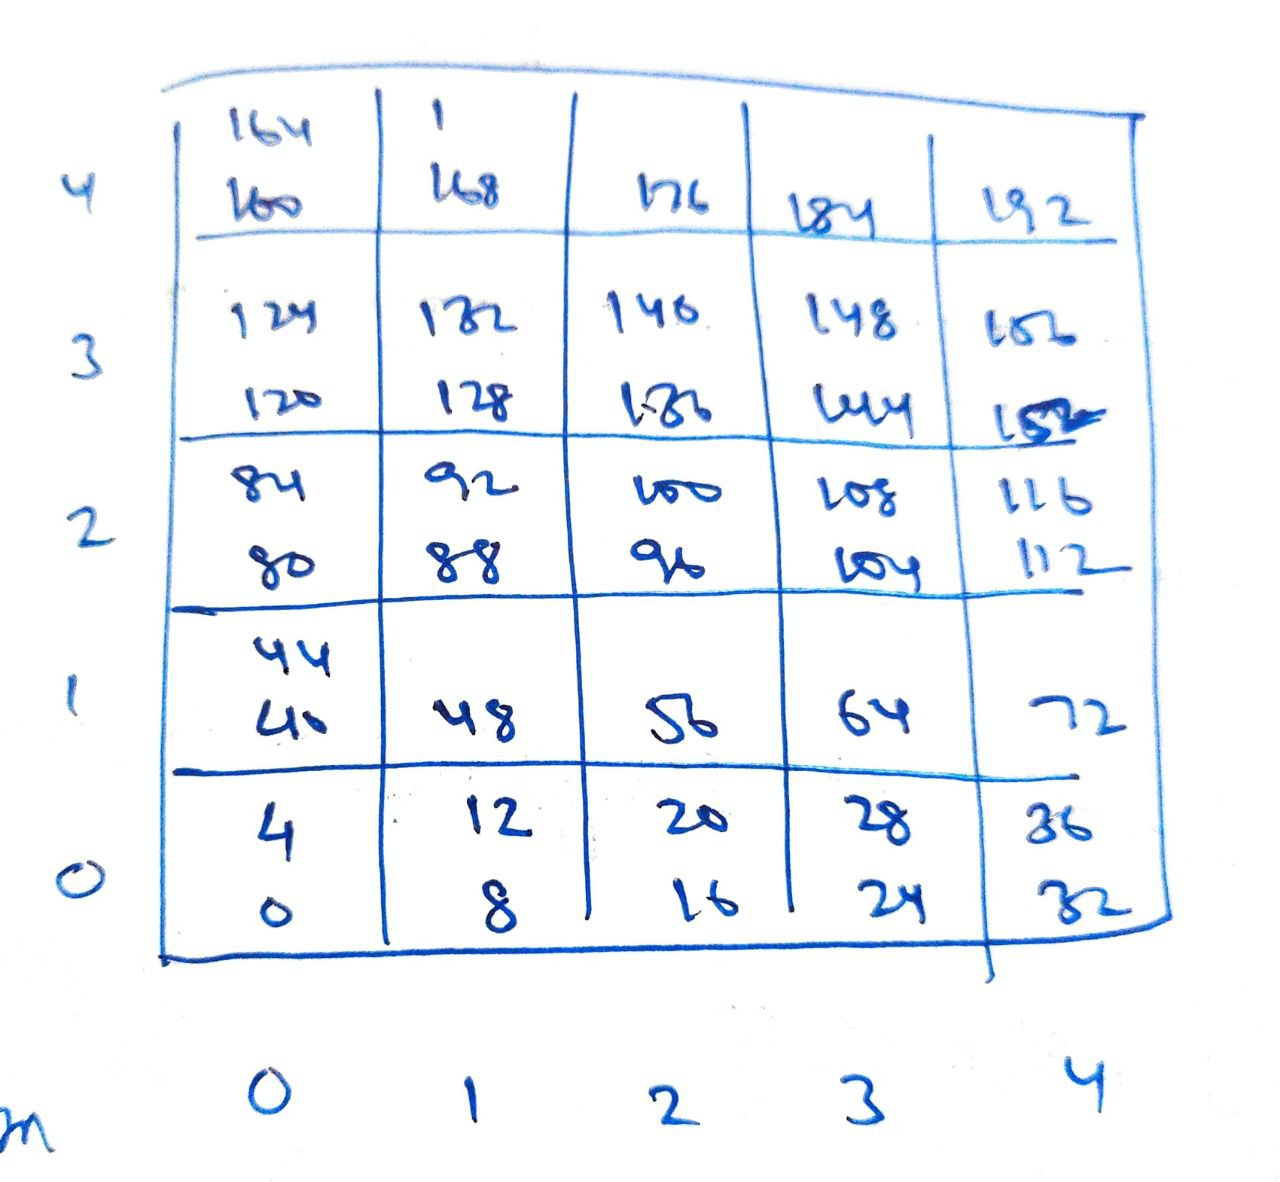

In [27]:
temp = A
for i in range(24):
    temp = iota(chi(pi(rho(theta(temp)))), i)
    print('\n####################### Round', i , '################\n')
    print_hex(temp)


########## Theta ########



C[0] = 0x00000001997b5853
C[1] = 0x8000000000000000
C[2] = 0x0000000000000000
C[3] = 0x0000000000000000
C[4] = 0x0000000000000000


D[0] = 0x0000000000000001
D[1] = 0x00000001997b5853
D[2] = 0x8000000000000000
D[3] = 0x0000000000000000
D[4] = 0x0000000332f6b0a6


[0, 0] 0x00000001997b5853 xored 0x0000000000000001 = 0x00000001997b5852
[1, 0] 0x0000000000000000 xored 0x00000001997b5853 = 0x00000001997b5853
[2, 0] 0x0000000000000000 xored 0x8000000000000000 = 0x8000000000000000
[3, 0] 0x0000000000000000 xored 0x0000000000000000 = 0x0000000000000000
[4, 0] 0x0000000000000000 xored 0x0000000332f6b0a6 = 0x0000000332f6b0a6
[0, 1] 0x0000000000000000 xored 0x0000000000000001 = 0x0000000000000001
[1, 1] 0x0000000000000000 xored 0x00000001997b5853 = 0x00000001997b5853
[2, 1] 0x0000000000000000 xored 0x8000000000000000 = 0x8000000000000000
[3, 1] 0x0000000000000000 xored 0x0000000000000000 = 0x0000000000000000
[4, 1] 0x0000000000000000 xored 0x0000000332f6b0a6 = 0x000

85 81 29 ac bd fc 85 b5 

08 00 00 00 00 00 00 00 

27 33 60 0a 6b 5f 39 6b 

08 00 00 00 00 00 00 10 

2f 33 00 00 00 70 0a 6b 

00 00 60 0a 6b 2f 33 10 

a6 b0 f6 32 03 00 00 00 

20 a6 b0 f6 32 03 00 00 

00 00 04 00 00 00 00 00 

a6 16 42 c4 31 03 00 00 

00 00 04 00 00 00 00 00 

00 4c 61 dd e0 b3 97 19 

00 00 00 00 10 00 00 00 

00 4c 61 ed 65 06 00 00 

00 40 00 30 85 b5 97 19 

00 00 00 00 10 00 00 00 

99 01 00 00 00 53 58 5b 

00 00 00 00 00 00 00 00 

d5 60 ed 65 06 53 58 7b 

00 00 00 00 00 02 00 20 

4c 61 ed 65 06 00 00 00 


########## Theta ########



C[0] = 0x42cfe4e276eca564
C[1] = 0xdebc6c49fcd08c90
C[2] = 0x6b589dde24a1acdd
C[3] = 0x529dc4b4e5103ddb
C[4] = 0xa5b6d3c0c3a0e0c9


D[0] = 0x18ce0b533a01f9e8
D[1] = 0x947edf5e3faffcde
D[2] = 0x7b87e52036f0f726
D[3] = 0x20353a5fa3e06d4e
D[4] = 0xd7020d7008c97713


[0, 0] 0x00000401997b5853 xored 0x18ce0b533a01f9e8 = 0x18ce0f52a37aa1bb
[1, 0] 0xb585300000001997 xored 0x947edf5e3faffcde = 0x21fbef5e3fafe549
[2, 0] 0x0000c8b

5c 53 fe f7 f8 69 ff 71 


########## Iota ########

0x1bce2f5aa452219a
0xa4bdd3f5f8c5671c
0xa7b4b0943b39c037
0xe3d078170baf346a
0x676c0bed5d96a784
0x3d6b7351c4815bc5
0x183baa98e97df697
0xc6707ec047b87a7a
0x64bbd39edbe986f4
0x608bfe42fb5f92ec
0x5ff1da4e3f1feaf2
0xe3f96805b50ada1f
0xbd8fccf0f0c0667a
0x00be76b0d76dd355
0xc144e80661e50f51
0x36472690c21f75ce
0xa09dd2c90c70b0b1
0xf571a3147f4b3a7d
0xd085ef4c7d872241
0xce18ad395343605c
0xd8fbcb2de6b055c9
0xb1e5cfa51da0b7e5
0x762ba493cd882834
0x4f6b5205b3716b4f
0x71ff69f8f7fe535c
9a 21 52 a4 5a 2f ce 1b 

1c 67 c5 f8 f5 d3 bd a4 

37 c0 39 3b 94 b0 b4 a7 

6a 34 af 0b 17 78 d0 e3 

84 a7 96 5d ed 0b 6c 67 

c5 5b 81 c4 51 73 6b 3d 

97 f6 7d e9 98 aa 3b 18 

7a 7a b8 47 c0 7e 70 c6 

f4 86 e9 db 9e d3 bb 64 

ec 92 5f fb 42 fe 8b 60 

f2 ea 1f 3f 4e da f1 5f 

1f da 0a b5 05 68 f9 e3 

7a 66 c0 f0 f0 cc 8f bd 

55 d3 6d d7 b0 76 be 00 

51 0f e5 61 06 e8 44 c1 

ce 75 1f c2 90 26 47 36 

b1 b0 70 0c c9 d2 9d a0 

7d 3a 4b 7f 14 a3 71 f5 

41 2

8c e3 19 82 cd b7 94 ee 

1f 37 99 d7 e9 bd 24 8c 

c0 e9 1f 93 d9 a8 ec 1f 

bb d3 51 f6 68 63 aa d7 

5d b4 56 06 55 3f f2 75 

3d 04 d1 3e b6 1e 2c fc 

67 cf bf 33 b3 70 97 1f 

87 f2 af 1b b6 a8 8b 83 

6e 6e 9b 5f ce 38 ba 68 


########## Iota ########

0x3cd56a3b4d07b1a9
0xa98c13ff151d6ffa
0xe3d7b41ff610beb4
0xdff048fd60ab0389
0x36b6233d16035f55
0x0ef067a664f60ca7
0x9e28645ff3e95706
0xd5dbd57dbb53d4f0
0xddbc43aad6ea6912
0x51074d574e6b74af
0x9cfe76915e049715
0x716ea83810384c57
0x8e7c9c8db79a7f86
0xe1d6f96cb12fcce8
0x293336df15d9beee
0x6b362f70934439c3
0xee94b7cd8219e38c
0x8c24bde9d799371f
0x1feca8d9931fe9c0
0xd7aa6368f651d3bb
0x75f23f550656b45d
0xfc2c1eb63ed1043d
0x1f9770b333bfcf67
0x838ba8b61baff287
0x68ba38ce5f9b6e6e
a9 b1 07 4d 3b 6a d5 3c 

fa 6f 1d 15 ff 13 8c a9 

b4 be 10 f6 1f b4 d7 e3 

89 03 ab 60 fd 48 f0 df 

55 5f 03 16 3d 23 b6 36 

a7 0c f6 64 a6 67 f0 0e 

06 57 e9 f3 5f 64 28 9e 

f0 d4 53 bb 7d d5 db d5 

12 69 ea d6 aa 43 bc dd 

af 74 6b 4e 57 4d 07 51 

15 9

^ ( 0x9491cdfbba8f609f [1, 2] 
& ~ 0x9c2a3379940a2616 [0, 2]
0 1 2 3
0x44695f73d1c9a073 [0, 3] 
= 0xd2e0956b514ba839 [0, 3] 
^ ( 0xde89ef3c80c29a5b [2, 3] 
& ~ 0x4840252578689731 [1, 3]
1 2 3 3
0x49102525175c96b5 [1, 3] 
= 0x4840252578689731 [1, 3] 
^ ( 0x97d1c1106f3693d6 [3, 3] 
& ~ 0xde89ef3c80c29a5b [2, 3]
2 3 4 3
0xf683c3b2800bbe53 [2, 3] 
= 0xde89ef3c80c29a5b [2, 3] 
^ ( 0xbe4b6c9e24cda64e [4, 3] 
& ~ 0x97d1c1106f3693d6 [3, 3]
3 4 0 3
0xd77150713e349be7 [3, 3] 
= 0x97d1c1106f3693d6 [3, 3] 
^ ( 0xd2e0956b514ba839 [0, 3] 
& ~ 0xbe4b6c9e24cda64e [4, 3]
4 0 1 3
0xb64b4c9a0cedb14e [4, 3] 
= 0xbe4b6c9e24cda64e [4, 3] 
^ ( 0x4840252578689731 [1, 3] 
& ~ 0xd2e0956b514ba839 [0, 3]
0 1 2 4
0xf233c99408e359f4 [0, 4] 
= 0x9217899568ea55f1 [0, 4] 
^ ( 0xe426689b78096c2f [2, 4] 
& ~ 0x958aadba9c0071ea [1, 4]
1 2 3 4
0x9dc2a9de1d82722a [1, 4] 
= 0x958aadba9c0071ea [1, 4] 
^ ( 0x6c6e6c6481834bc6 [3, 4] 
& ~ 0xe426689b78096c2f [2, 4]
2 3 4 4
0xe6b67b087e2dcc1f [2, 4] 
= 0xe426689b78096c2f [2, 4] 


c8 44 77 0f 4f 64 ed bf 

e2 a5 ac 74 ff 9b ac 86 

ac ed 7b fe 20 28 5a 9b 

8d 38 d5 72 88 7c 16 55 


########## Chi ########

0 1 2 0
0x3fb46d4a220f1e23 [0, 0] 
= 0xbdb5664f12e70f2b [0, 0] 
^ ( 0xaa018be770e8198a [2, 0] 
& ~ 0x2d0ef4e2c5054ec3 [1, 0]
1 2 3 0
0x38c2b0fac603a882 [1, 0] 
= 0x2d0ef4e2c5054ec3 [1, 0] 
^ ( 0x9dccc7be438ee7c9 [3, 0] 
& ~ 0xaa018be770e8198a [2, 0]
2 3 4 0
0xe8208be668c9098a [2, 0] 
= 0xaa018be770e8198a [2, 0] 
^ ( 0x4ea985835a25f4c9 [4, 0] 
& ~ 0x9dccc7be438ee7c9 [3, 0]
3 4 0 0
0x2cd8a5f2434ceceb [3, 0] 
= 0x9dccc7be438ee7c9 [3, 0] 
^ ( 0xbdb5664f12e70f2b [0, 0] 
& ~ 0x4ea985835a25f4c9 [4, 0]
4 0 1 0
0x4ea315239f25b409 [4, 0] 
= 0x4ea985835a25f4c9 [4, 0] 
^ ( 0x2d0ef4e2c5054ec3 [1, 0] 
& ~ 0xbdb5664f12e70f2b [0, 0]
0 1 2 1
0x9c67a3880c9b23ed [0, 1] 
= 0x9ff522a8849a63ed [0, 1] 
^ ( 0x3928fe49ef1438d [2, 1] 
& ~ 0x50441ece76f0afad [1, 1]
1 2 3 1
0x24010edc16fa8fed [1, 1] 
= 0x50441ece76f0afad [1, 1] 
^ ( 0x75579032e27b22cd [3, 1] 
& ~ 0x3928fe49ef1438d [2, 

e0 83 69 b6 8d bf 65 dd 

39 ee 0c cd d2 ab c8 fa 

fc c6 06 79 0d 02 5b 7f 

8f 73 d9 d1 01 41 07 23 

fc 7d ac b9 4b 10 8e 9c 

41 ff c0 81 5a 74 a0 f8 

37 d1 a9 65 af 6a b2 75 

7d 89 0b 9c 10 c3 c8 fd 

18 36 fe 99 f5 a2 15 d4 

69 e2 e9 dd 7d b1 31 c8 

1a e6 07 6b 8b 1c c4 65 

72 7c 2d 2d dc 0e 9e e0 

ff be 3b e5 f6 61 ee e8 

fc ed 93 a9 f3 6f 48 63 

0d 2e 6a 0a 5d ae 17 97 

18 99 96 03 34 42 22 39 

9f cd 13 65 d4 74 3e 30 

98 a0 3b 0e 5d ba 86 ca 

41 fe f1 68 53 64 0f fc 

2b 03 c4 74 cf 54 89 e2 

75 ee f6 54 e5 56 28 6a 

59 ce c4 5a 93 9e 32 ee 

18 90 90 f6 04 27 e8 01 

c9 55 4d b7 2e b0 94 e9 


########## Chi ########

0 1 2 0
0xc162a701e402f57f [0, 0] 
= 0xe3eaa753ad069966 [0, 0] 
^ ( 0xfac8abd2cd0cee39 [2, 0] 
& ~ 0xdd65bf8db66983e0 [1, 0]
1 2 3 0
0xd876bf80866b8324 [1, 0] 
= 0xdd65bf8db66983e0 [1, 0] 
^ ( 0x7f5b020d7906c6fc [3, 0] 
& ~ 0xfac8abd2cd0cee39 [2, 0]
2 3 4 0
0xfaccead24dd5df3a [2, 0] 
= 0xfac8abd2cd0cee39 [2, 0] 
^ ( 0x23074101d1d9738f [4, 0] 
& ~ 0

dd 8c 19 48 c6 f4 66 5d 

fa 12 ec 52 9b 28 1a 1b 

94 bb 78 fc 4c f3 b5 e4 

68 6e 59 26 58 a1 29 2c 

98 7c 45 6c 92 41 d6 57 

44 c5 17 09 fc ed 25 a0 

65 a9 11 a9 f2 73 50 db 

76 f7 fc 5d ab 5e f8 31 

44 ab 93 2f 32 c9 6f 1f 

f4 0d c3 b5 ab 21 7e 44 

b5 fb 9d d7 e5 d9 0f 33 

fe 4c 51 e2 62 06 1f 09 

4f e6 8a 38 a9 29 68 56 

f6 2d 59 ce 6a 54 60 fc 

2a 91 e4 5a 35 aa 1b 9f 

4d 7c c7 93 cc 0c b0 5d 

9c fb 53 2a 8a a5 7d 93 

7b 6c fb 27 29 45 9d 6a 

d9 70 f8 23 35 6d 8a fd 


########## Pi ########

Storing 0x83b3dc1af04ba0e4 0 [[0], [0]] at 0
Storing 0x5d66f4c648198cdd 48 [[1], [1]] at 8
Storing 0xdb5073f2a911a965 96 [[2], [2]] at 16
Storing 0x566829a9388ae64f 144 [[3], [3]] at 24
Storing 0xfd8a6d3523f870d9 192 [[4], [4]] at 32
Storing 0xd187ca7cc2117eeb 24 [[3], [0]] at 40
Storing 0x2c29a15826596e68 72 [[4], [1]] at 48
Storing 0x57d641926c457c98 80 [[0], [2]] at 56
Storing 0x330fd9e5d79dfbb5 128 [[1], [3]] at 64
Storing 0x937da58a2a53fb9c 176 [[2], [4]] at 72
Storing 0x

[1, 0] 0xe0bcbfefad5196f2 rotated by 1 gives 0xe0bcbfefad5196f2
[2, 0] 0x453bc40718954a7f rotated by 62 gives 0x453bc40718954a7f
[3, 0] 0x97267b09c873cf24 rotated by 28 gives 0x97267b09c873cf24
[4, 0] 0xdf2dd3bf92cc0796 rotated by 27 gives 0xdf2dd3bf92cc0796
[0, 1] 0xac13ffcc55415e80 rotated by 36 gives 0xac13ffcc55415e80
[1, 1] 0xb5d27a1d4003b168 rotated by 44 gives 0xb5d27a1d4003b168
[2, 1] 0xe04f9679f6f38f1a rotated by 6 gives 0xe04f9679f6f38f1a
[3, 1] 0xb0f2513b37675699 rotated by 55 gives 0xb0f2513b37675699
[4, 1] 0xc1b61ac4b73f80ca rotated by 20 gives 0xc1b61ac4b73f80ca
[0, 2] 0xc757b5b676bd917a rotated by 3 gives 0xc757b5b676bd917a
[1, 2] 0x6ee86bfb252f465f rotated by 10 gives 0x6ee86bfb252f465f
[2, 2] 0x050a075fffac94f4 rotated by 43 gives 0x050a075fffac94f4
[3, 2] 0x7ffb82404abac03c rotated by 25 gives 0x7ffb82404abac03c
[4, 2] 0xf3f21c60b1c4f806 rotated by 39 gives 0xf3f21c60b1c4f806
[0, 3] 0x5867c7f94ebb7816 rotated by 41 gives 0x5867c7f94ebb7816
[1, 3] 0x2c2ac42fa3544bcb ro

ae bb 71 14 be 2b 21 83 

fa e6 74 33 07 ff 7a 13 

91 bb 16 97 28 1c bf 51 

d3 bf 07 77 97 2e a7 01 

f0 91 ed e2 fa 05 ca 1a 

45 df cb 13 75 24 8b 9f 

1d fc 40 cd 5e dd ce 52 

11 d3 71 86 1d 09 31 63 

14 44 8a 95 39 80 fd ce 

99 30 a3 9d 41 aa 6e 18 

a5 20 1a 7d 11 6a 82 43 

8a 3b d6 42 01 ab ae be 

76 df fb 9f 78 3b e4 8b 

52 37 cc 05 ce fa a8 d2 

78 80 19 65 2c cd d4 6d 

38 29 c6 b8 11 e7 9c e2 

e8 96 d8 a2 f3 ff 2a b8 

2e 37 82 33 d4 44 5f 0e 

3a 0a 14 29 36 6d fe fc 

97 8f 5a 3d ae 63 99 6f 

db 69 21 dc eb 4b 44 20 

d1 aa 5c d2 4a 1c c0 35 

6c 83 60 0f 79 c7 97 dc 


########## Rho ########

[0, 0] 0xe4d4145ed130c2bf rotated by 0 gives 0xe4d4145ed130c2bf
[1, 0] 0x979fe89f27602abb rotated by 1 gives 0x979fe89f27602abb
[2, 0] 0x83212bbe1471bbae rotated by 62 gives 0x83212bbe1471bbae
[3, 0] 0x137aff073374e6fa rotated by 28 gives 0x137aff073374e6fa
[4, 0] 0x51bf1c289716bb91 rotated by 27 gives 0x51bf1c289716bb91
[0, 1] 0x01a72e977707bfd3 rotated by 36 gives 0x01a72

7e a0 86 ae ce 63 a9 0e 

1b 9e 17 56 5d b1 ee db 

a9 dc e1 51 e2 e5 e6 98 

49 be 08 df b8 ab 44 b0 


########## Theta ########



C[0] = 0x414a64987f87bbcf
C[1] = 0xe6ef303a98f6be40
C[2] = 0xa00c905d50e8c20b
C[3] = 0x62c98df014e6ec08
C[4] = 0x293f61817664b612


D[0] = 0xe4e101f44789ca93
D[1] = 0x01534422de563fd8
D[2] = 0x237c2bdab13b6650
D[3] = 0xf272535fbc21ae2f
D[4] = 0xe05d44c0ebe99b96


[0, 0] 0xe4d43e4ec230c3f5 xored 0xe4e101f44789ca93 = 0x00353fba85b90966
[1, 0] 0xf76f50ae6c58aa39 xored 0x01534422de563fd8 = 0xf63c148cb20e95e1
[2, 0] 0xd08f2ad43398b9c8 xored 0x237c2bdab13b6650 = 0xf3f3010e82a3df98
[3, 0] 0xfa744f140c37c5c5 xored 0xf272535fbc21ae2f = 0x08061c4bb0166bea
[4, 0] 0xe8d5427800941b25 xored 0xe05d44c0ebe99b96 = 0x088806b8eb7d80b3
[0, 1] 0x15134eaf2d77af56 xored 0xe4e101f44789ca93 = 0xf1f24f5b6afe65c5
[1, 1] 0x91db6b2f20b3bf11 xored 0x01534422de563fd8 = 0x90882f0dfee580c9
[2, 1] 0x33ec8189ce5201be xored 0x237c2bdab13b6650 = 0x1090aa537f6967ee
[3, 1] 0x23384bb819960e63 

ee 29 b6 88 b9 1b 66 27 

fd 5d f0 62 0c 9b 8c 50 

64 3c 58 04 3b b5 0d 57 

37 a7 98 60 8d 24 a4 5f 

8e 02 37 4b 38 8d d6 23 

e4 f7 8c a0 be e7 02 af 

df 29 f2 66 df 26 fc ca 

ae 1a c9 92 98 d6 d1 39 

43 1a 22 0c ab 02 f5 98 

13 97 b5 b6 10 53 ca 3f 

eb 2b 19 61 19 00 a8 6c 

85 f3 db da 6e 44 26 0f 

12 f6 6c ef 0a 2f d2 c0 

41 00 df 4d b8 dd dc 8b 

bb 05 a6 7b f4 de 68 4c 

7c 4a 56 18 a5 6e 5a 87 

b6 f5 6c 1f 1a 7d 3e b9 

f9 9e 97 b7 98 1e 07 e8 

f5 8c 48 87 dc 53 c9 57 

f0 75 cd ba ec 84 ce ae 

cf d7 8c a0 81 d2 68 a4 

52 4f da e2 19 65 60 26 

31 4a f4 62 6a 2c 74 ad 

f5 5d c4 93 17 a4 78 08 

88 76 10 90 bd ba e8 3d 


########## Theta ########



C[0] = 0xc7fe403af1f96852
C[1] = 0x0a08e1be236f3d43
C[2] = 0xeb7d7e5bac9e0410
C[3] = 0x133c0c5535e96c35
C[4] = 0xc3523e8dacf9935e


D[0] = 0xd743fdf1ea27e9d8
D[1] = 0x1104bc8da8c56073
D[2] = 0x2c70f91448bde529
D[3] = 0x6dd90340f56d22ad
D[4] = 0x9cc08c20d61bbc90


[0, 0] 0x27661bb988b629ee xored 0xd743fdf1ea27e9d8 = 0xf

f7 86 b1 81 d2 91 b5 da 

3c 51 49 38 ea 0d c2 83 

3b 72 70 9d c5 3b 4e 77 

8b ad 67 57 a0 23 75 72 

11 3e 38 d3 e3 52 5b d6 

3c 26 fa d6 00 de 79 56 

56 7e 71 5c b9 b3 4c c2 

b7 eb 27 e0 aa 59 0b e1 

08 3d b8 0c 51 e2 b3 fc 


####################### Round 10 ################

23 91 81 f4 08 f4 24 78 

e3 2e a2 40 2f cd 9c 67 

7e dd 30 26 67 ce b8 84 

3e 82 16 cb fd e2 8e e3 

8b 04 a2 7b 35 58 3d 09 

6c d3 e3 e2 5d bd 06 d5 

cd d6 3a b8 e1 1a a6 d3 

9f 10 bf dc ec e5 5f df 

e9 34 14 7a 57 f5 e7 fb 

62 15 51 dd 0d 98 20 32 

24 71 aa d4 42 4b 20 12 

c7 81 3e 9b 1e 6b 43 66 

31 87 d8 f1 c5 46 b0 40 

22 53 eb d2 6f 89 18 0c 

6d 4c 48 f1 98 8a 8a d5 

00 e8 b6 8f f8 69 ab c5 

f7 86 b1 81 d2 91 b5 da 

3c 51 49 38 ea 0d c2 83 

3b 72 70 9d c5 3b 4e 77 

8b ad 67 57 a0 23 75 72 

11 3e 38 d3 e3 52 5b d6 

3c 26 fa d6 00 de 79 56 

56 7e 71 5c b9 b3 4c c2 

b7 eb 27 e0 aa 59 0b e1 

08 3d b8 0c 51 e2 b3 fc 


########## Theta ########



C[0] = 0xacf2390c9e46e57a
C[1] = 0

c2 85 54 24 7a b5 ba 7c 

81 50 9f 1b 91 ee 5e 64 

9d ec 6c 2c 51 53 18 fb 

f3 07 2f 54 57 37 8d a4 

a5 7f c0 4e 98 90 9b fe 

c0 4b a5 26 9e ac dc 38 

8b c8 8d a3 70 da c4 75 

ec 24 3e 9f 7e c2 f1 0b 

2f 82 76 12 ec 94 5a 33 

1c 81 df 94 fc 33 79 46 

a3 7b e8 42 0b 01 d4 e6 

71 93 0f 76 a8 48 b2 ac 

e0 35 82 74 4d 70 3c 91 

f6 04 69 20 35 b7 36 d0 

8d a0 8e 6d 4a ca c1 34 


########## Iota ########

0xe52d990c131e6e2a
0xadc466aee9c45f97
0x5d1781f120649682
0xeb5b4a8ca0e340bf
0xd1b8af008aa01852
0x3bdb074d279f224a
0x6ee1fe683fba1700
0xbad137bce28870ee
0x3dd638be84dfd821
0xb336e71ff2dc96f1
0x7cbab57a245485c2
0x645eee911b9f5081
0xfb1853512c6cec9d
0xa48d3757542f07f3
0xfe9b90984ec07fa5
0x38dcac9e26a54bc0
0x75c4da70a38dc88b
0x0bf1c27e9f3e24ec
0x335a94ec1276822f
0x467933fc94df811c
0xe6d4010b42e87ba3
0xacb248a8760f9371
0x913c704d748235e0
0xd036b735206904f6
0x34c1ca4a6d8ea08d
2a 6e 1e 13 0c 99 2d e5 

97 5f c4 e9 ae 66 c4 ad 

82 96 64 20 f1 81 17 5d 

bf 40 e3 a0 8c 4a 5b eb 

52 1

^ ( 0x75c481a2aa34ab92 [3, 3] 
& ~ 0xf3198595fe7aec50 [2, 3]
2 3 4 3
0xf312fb95aff0e87c [2, 3] 
= 0xf3198595fe7aec50 [2, 3] 
^ ( 0x248b7fa279ba8ebe [4, 3] 
& ~ 0x75c481a2aa34ab92 [3, 3]
3 4 0 3
0x74c001b3ae74cb93 [3, 3] 
= 0x75c481a2aa34ab92 [3, 3] 
^ ( 0x10cef9325c2ee27 [0, 3] 
& ~ 0x248b7fa279ba8ebe [4, 3]
4 0 1 3
0xaec86fe2eba69eb6 [4, 3] 
= 0x248b7fa279ba8ebe [4, 3] 
^ ( 0x8b47505296def62d [1, 3] 
& ~ 0x10cef9325c2ee27 [0, 3]
0 1 2 4
0x46382a48a97759c3 [0, 4] 
= 0xc070aa01af07f981 [0, 4] 
^ ( 0xfecac9cbbf7dbc72 [2, 4] 
& ~ 0x79b34f96f90f1c31 [1, 4]
1 2 3 4
0x79825982b98f5fb0 [1, 4] 
= 0x79b34f96f90f1c31 [1, 4] 
^ ( 0x1c391e54d48963b3 [3, 4] 
& ~ 0xfecac9cbbf7dbc72 [2, 4]
2 3 4 4
0x9d8a48eb9c49a87e [2, 4] 
= 0xfecac9cbbf7dbc72 [2, 4] 
^ ( 0x7341816023bd752f [4, 4] 
& ~ 0x1c391e54d48963b3 [3, 4]
3 4 0 4
0x9c093455588beb33 [3, 4] 
= 0x1c391e54d48963b3 [3, 4] 
^ ( 0xc070aa01af07f981 [0, 4] 
& ~ 0x7341816023bd752f [4, 4]
4 0 1 4
0x4ac2c4f673b5711f [4, 4] 
= 0x7341816023bd752f [4, 4] 
^ 

^ ( 0x971fb6c18bc76e42 [4, 0] 
& ~ 0xb39fb9e58b3f56bd [3, 0]
3 4 0 0
0xfb3fb9c5ab2f478c [3, 0] 
= 0xb39fb9e58b3f56bd [3, 0] 
^ ( 0xc9a994a0aa573931 [0, 0] 
& ~ 0x971fb6c18bc76e42 [4, 0]
4 0 1 0
0x974bd4d5cecf6e06 [4, 0] 
= 0x971fb6c18bc76e42 [4, 0] 
^ ( 0xc9dcf694cd1c1865 [1, 0] 
& ~ 0xc9a994a0aa573931 [0, 0]
0 1 2 1
0xb2109c99e2dfcbe5 [0, 1] 
= 0xb6007cd9e6df5be0 [0, 1] 
^ ( 0x1c31e0474c009005 [2, 1] 
& ~ 0x3aef1d0feae86202 [1, 1]
1 2 3 1
0x5b25083f691e2918 [1, 1] 
= 0x3aef1d0feae86202 [1, 1] 
^ ( 0x79db9535c3f6db1f [3, 1] 
& ~ 0x1c31e0474c009005 [2, 1]
2 3 4 1
0x9e15cacd78009445 [2, 1] 
= 0x1c31e0474c009005 [2, 1] 
^ ( 0xdba73b9bb4100450 [4, 1] 
& ~ 0x79db9535c3f6db1f [3, 1]
3 4 0 1
0x5ddbd175813980bf [3, 1] 
= 0x79db9535c3f6db1f [3, 1] 
^ ( 0xb6007cd9e6df5be0 [0, 1] 
& ~ 0xdba73b9bb4100450 [4, 1]
4 0 1 1
0xd3483a9dbc302452 [4, 1] 
= 0xdba73b9bb4100450 [4, 1] 
^ ( 0x3aef1d0feae86202 [1, 1] 
& ~ 0xb6007cd9e6df5be0 [0, 1]
0 1 2 2
0x163de958aed1391c [0, 2] 
= 0x175ff85ecec17a2d [0, 2] 


40 5d f6 d2 d5 a7 25 db 

46 fd b1 54 5e d4 98 01 

9a 92 97 79 ff 85 d7 9a 

e4 0a ce df fd 51 76 de 

3b f5 63 30 9b 41 0e 00 

13 dc 3a 5b a4 f3 73 69 

5d 15 01 74 99 de e8 d5 


########## Chi ########

0 1 2 0
0x90d3f0ee7f4aba51 [0, 0] 
= 0xe6db90c75f5af215 [0, 0] 
^ ( 0x7e1871ade2b4da4c [2, 0] 
& ~ 0x89d219d6d2e49389 [1, 0]
1 2 3 0
0x89571794c2e497a9 [1, 0] 
= 0x89d219d6d2e49389 [1, 0] 
^ ( 0x6e851f42b2009c2c [3, 0] 
& ~ 0x7e1871ade2b4da4c [2, 0]
2 3 4 0
0x7f7ab11ce355f90e [2, 0] 
= 0x7e1871ade2b4da4c [2, 0] 
^ ( 0xbe6c0b1b3e1a34e [4, 0] 
& ~ 0x6e851f42b2009c2c [3, 0]
3 4 0 0
0x8a9c0f04fe1acc3d [3, 0] 
= 0x6e851f42b2009c2c [3, 0] 
^ ( 0xe6db90c75f5af215 [0, 0] 
& ~ 0xbe6c0b1b3e1a34e [4, 0]
4 0 1 0
0x2e6c9a13345a2c6 [4, 0] 
= 0xbe6c0b1b3e1a34e [4, 0] 
^ ( 0x89d219d6d2e49389 [1, 0] 
& ~ 0xe6db90c75f5af215 [0, 0]
0 1 2 1
0xd90158eaf0c0f128 [0, 1] 
= 0xfb6030e8f4a47930 [0, 1] 
^ ( 0x7a7768b3cff48d1c [2, 1] 
& ~ 0xdd1684f1db9a25c4 [1, 1]
1 2 3 1
0x5d9e06f1eb925725 [1, 1] 
= 0xdd1684f

Storing 0x32b6be1dd6e902bc 56 [[2], [1]] at 88
Storing 0x0f6d76aab5cc66d2 104 [[3], [2]] at 96
Storing 0x5d72c149e0f6b56d 152 [[4], [3]] at 104
Storing 0x0499fa111d487475 160 [[0], [4]] at 112
Storing 0xf5f0ed4ab3c90ad1 32 [[4], [0]] at 120
Storing 0x7f2d1fb5ec39c31d 40 [[0], [1]] at 128
Storing 0x600d3bda43dfe02e 88 [[1], [2]] at 136
Storing 0xe812edefbff8fbb6 136 [[2], [3]] at 144
Storing 0xef8f3a9e6eb9d33d 184 [[3], [4]] at 152
Storing 0xb329438686063606 16 [[2], [0]] at 160
Storing 0xdbb763ff1e33b192 64 [[3], [1]] at 168
Storing 0xe94ea9b52c5c6287 112 [[4], [2]] at 176
Storing 0x055e9e9e7e98da91 120 [[0], [3]] at 184
Storing 0x31521d21270f9085 168 [[1], [4]] at 192
0x9711343558781a0b
0x7b1e0a6cd6260368
0x254eb70239604660
0x3b025167c4dfe7d9
0xc7419fc445aa7a83
0x81565af4366c263a
0xa53c9a44116c6229
0xc73e7cfcd2facbd4
0x0d56c7ea1a3cf729
0x64eb3e509de5faac
0xe408e60a3fe2e2d8
0x32b6be1dd6e902bc
0x0f6d76aab5cc66d2
0x5d72c149e0f6b56d
0x0499fa111d487475
0xf5f0ed4ab3c90ad1
0x7f2d1fb5ec39c31d

[0, 2] 0x8019feee82181c7e rotated by 3 gives 0x8019feee82181c7e
[1, 2] 0xd214411cc9ca48b4 rotated by 10 gives 0xd214411cc9ca48b4
[2, 2] 0x43d50115c4fae979 rotated by 43 gives 0x43d50115c4fae979
[3, 2] 0x810bcc9e141162c7 rotated by 25 gives 0x810bcc9e141162c7
[4, 2] 0xccb21b4331450ba3 rotated by 39 gives 0xccb21b4331450ba3
[0, 3] 0x9ca895462cf1b017 rotated by 41 gives 0x9ca895462cf1b017
[1, 3] 0x478fa5d00f0803a8 rotated by 45 gives 0x478fa5d00f0803a8
[2, 3] 0x2bb164656fe02f9c rotated by 15 gives 0x2bb164656fe02f9c
[3, 3] 0xc41b2172f8fda654 rotated by 21 gives 0xc41b2172f8fda654
[4, 3] 0x3f1fd16cce8d6dc3 rotated by 8 gives 0x3f1fd16cce8d6dc3
[0, 4] 0xfa3993c03ab4eee7 rotated by 18 gives 0xfa3993c03ab4eee7
[1, 4] 0x6f170bb513a2f2a7 rotated by 2 gives 0x6f170bb513a2f2a7
[2, 4] 0x957fe53b4165ad38 rotated by 61 gives 0x957fe53b4165ad38
[3, 4] 0xbb0ed5c528dda9b1 rotated by 56 gives 0xbb0ed5c528dda9b1
[4, 4] 0xa359c41fd33a6ee7 rotated by 14 gives 0xa359c41fd33a6ee7
0x7a09d971edc644ec
0xa35c689

[4, 0] 0xf1d5f4429989c8d5 xored 0x977cc313d78f3a2a = 0x66a937514e06f2ff
[0, 1] 0xb0245a4f3176f598 xored 0xa469b527fa1727e3 = 0x144def68cb61d27b
[1, 1] 0x7147069db1c3a5e5 xored 0x77073a44e397c458 = 0x06403cd9525461bd
[2, 1] 0x1245037218c457f2 xored 0x872fc9203d09bcd6 = 0x956aca5225cdeb24
[3, 1] 0xa0750bf9e5e803e9 xored 0x5f8fafb97994b345 = 0xfffaa4409c7cb0ac
[4, 1] 0x53fcf8b72ca5b5c3 xored 0x977cc313d78f3a2a = 0xc4803ba4fb2a8fe9
[0, 2] 0xb7744a939550f6a8 xored 0xa469b527fa1727e3 = 0x131dffb46f47d14b
[1, 2] 0xea531cc4c12efadc xored 0x77073a44e397c458 = 0x9d54268022b93e84
[2, 2] 0x7c28a0d4bd903f59 xored 0x872fc9203d09bcd6 = 0xfb0769f48099838f
[3, 2] 0xbf8d6cce8d2dd036 xored 0x5f8fafb97994b345 = 0xe002c377f4b96373
[4, 2] 0x0782fa9ffb9ce0b4 xored 0x977cc313d78f3a2a = 0x90fe398c2c13da9e
[0, 3] 0x08796325828e002e xored 0xa469b527fa1727e3 = 0xac10d602789927cd
[1, 3] 0x2231d47ab60a6436 xored 0x77073a44e397c458 = 0x5536ee3e559da06e
[2, 3] 0x508d7b22e9021b69 xored 0x872fc9203d09bcd6 = 0xd7a2b202d

cc 1f 09 3a 59 f4 52 7d 

cb 09 9f 97 43 ee d4 cd 

a0 08 5d 7b ac b0 4f 9e 

10 ab 2e 7a a3 fc dd db 

b1 ca 6a 4f e6 ea 4d 3c 

f9 eb 50 25 a8 d3 3d 75 

7d 46 6f 4a 36 9e cb 2a 

05 cb 7d 73 b9 98 a6 5a 

8f b1 b0 ef c6 c2 cb cf 

d6 41 0d 23 42 4c 5d ca 

8f 3d 65 3b 89 fc 02 f0 

cb 49 15 5b 9d 37 f2 ca 

0c 1f db 57 b4 4d 1c bf 

7f 12 da ec 9a 84 64 76 

71 aa db a3 83 79 01 d9 

1f 1c f3 8f 31 ec f2 4a 

9e de 18 7e d5 3a d9 c9 

b9 3e ee 20 42 6d 7d 64 

1e 05 1f f7 6a 6b 5d c1 

61 18 ac 21 cd 83 4e 32 

68 e3 4d a9 68 e3 da fc 


########## Theta ########



C[0] = 0xf559b4f1ff26916e
C[1] = 0x58b35883fce86c1e
C[2] = 0x5d73ca24951da93e
C[3] = 0x105ac57a70b4e65d
C[4] = 0x4e45d421028236cd


D[0] = 0xff236526fb52eef1
D[1] = 0x4fbe20b8d51dc312
D[2] = 0x7806d2771d81a0a4
D[3] = 0xc1f862669019c4a4
D[4] = 0xfae9ac998ef9c480


[0, 0] 0x116dc9cc07db498d xored 0xff236526fb52eef1 = 0xee4eaceafc89a77c
[1, 0] 0x473b506083fd8e0e xored 0x4fbe20b8d51dc312 = 0x088570d856e04d1c
[2, 0] 0xfe5c1bb

15 0a 33 25 22 3c e8 2d 

a0 9f 98 26 91 48 40 1b 

e9 be be 83 21 01 0f 99 

c6 92 3d e4 c2 82 87 27 

77 35 35 76 87 8b c8 c5 

98 6c b0 a2 d9 00 61 a6 

33 cd 61 9d b7 f8 72 2b 

cc 91 f1 a0 c0 c7 ab 0d 

41 c1 31 b4 70 b7 96 e5 

87 ce 6a c2 ae aa fc 0b 

f6 88 e2 20 05 84 7d ee 

51 76 95 a2 7b f4 dc 8f 

2a ce 81 97 6f 7f 65 a5 


########## Iota ########

0x6e4efc4a9c0da267
0x789d0d5e8b235ac6
0x0bd15c1e69dd8f1d
0x50a4dc4f2ea2b953
0xd34d48f808fa490c
0x6cae91bde4aadf9f
0xa39abc82b3986d5f
0xab6ff9a639bf00c1
0xfb435e8c0d2d9b50
0xc43b5d21ae43f4f7
0x182ee9b2a9d5986c
0xe4cb3518e10a7888
0x2de83c2225330a15
0x1b40489126989fa0
0x990f012183bebee9
0x278782c2e43d92c6
0xc5c88b8776353577
0xa66100d9a2b06c98
0x2b72f8b79d61cd33
0x0dabc7c0a0f191cc
0xe596b770b431c141
0x0bfcaaaec26ace87
0xee7d840520e288f6
0x8fdcf47ba2957651
0xa5657f6f9781ce2a
67 a2 0d 9c 4a fc 4e 6e 

c6 5a 23 8b 5e 0d 9d 78 

1d 8f dd 69 1e 5c d1 0b 

53 b9 a2 2e 4f dc a4 50 

0c 49 fa 08 f8 48 4d d3 

9f df aa e4 bd 91 ae 6c 

5f 6

^ ( 0xab081bc755a79750 [0, 0] 
& ~ 0xf687abe7e9330034 [4, 0]
4 0 1 0
0xf6078fffeb6b08ba [4, 0] 
= 0xf687abe7e9330034 [4, 0] 
^ ( 0x1803f1d137f8dce [1, 0] 
& ~ 0xab081bc755a79750 [0, 0]
0 1 2 1
0x1594e633cf617b9a [0, 1] 
= 0x7fd4f611cd88199a [0, 1] 
^ ( 0xeb4071fb03fd6ade [2, 1] 
& ~ 0x850965d9e11618df [1, 1]
1 2 3 1
0x850c67d9811499fe [1, 1] 
= 0x850965d9e11618df [1, 1] 
^ ( 0xa80572f0601fa329 [3, 1] 
& ~ 0xeb4071fb03fd6ade [2, 1]
2 3 4 1
0xedb2f4f184fd2ecc [2, 1] 
= 0xeb4071fb03fd6ade [2, 1] 
^ ( 0xa6f2d59a87194632 [4, 1] 
& ~ 0xa80572f0601fa329 [3, 1]
3 4 0 1
0xf10150f1289fbaa1 [3, 1] 
= 0xa80572f0601fa329 [3, 1] 
^ ( 0x7fd4f611cd88199a [0, 1] 
& ~ 0xa6f2d59a87194632 [4, 1]
4 0 1 1
0x26fbd452a70f4677 [4, 1] 
= 0xa6f2d59a87194632 [4, 1] 
^ ( 0x850965d9e11618df [1, 1] 
& ~ 0x7fd4f611cd88199a [0, 1]
0 1 2 2
0x767ae4e52b6dd36 [0, 2] 
= 0x55ad0c49c8b65f34 [0, 2] 
^ ( 0xf3eaea8fdf26ca1a [2, 2] 
& ~ 0xa1345dc865ee689c [1, 2]
1 2 3 2
0xad344cd84537483c [1, 2] 
= 0xa1345dc865ee689c [1, 2] 
^ 

0xc11f85a6da2049b9
e1 f1 22 14 73 40 35 f9 

7f c0 5f 7d 5f 35 db b7 

d7 78 47 b2 f4 4d 17 7b 

5c 24 17 57 6d 6b 0d b8 

46 52 f2 c3 6a 21 0e bf 

90 77 e4 a4 f8 0a a3 0f 

c8 20 30 6f c8 4e 4b d3 

68 5d 9d dd d4 aa 0b 4a 

54 67 bd 29 9e 42 49 05 

19 6c a3 77 f1 7c e2 73 

29 17 00 65 74 9a 37 e6 

b8 df 01 4d 94 3d c4 96 

02 98 cb 43 49 fa 4d 35 

aa 28 98 92 0c 57 2a f8 

a9 ab 63 cd a0 67 d5 0a 

b4 86 97 f6 41 46 c4 cf 

70 d2 23 bb 11 d0 40 66 

f7 c5 b1 62 0f f7 fb 3f 

89 03 a1 1d 7f c6 47 e7 

cc df 8b 66 43 eb 53 f4 

16 6c 53 a3 70 1e 9d a1 

f4 df b4 39 f4 d3 0e 4e 

f3 44 7f 89 e3 a6 b1 b9 

b5 75 f4 a1 8a 5e 72 05 

b9 49 20 da a6 85 1f c1 


########## Chi ########

0 1 2 0
0xb13108d39622c961 [0, 0] 
= 0xf93540731422f1e1 [0, 0] 
^ ( 0x7b174df4b24778d7 [2, 0] 
& ~ 0xb7db355f7d5fc07f [1, 0]
1 2 3 0
0x37d31756384fc477 [1, 0] 
= 0xb7db355f7d5fc07f [1, 0] 
^ ( 0xb80d6b6d5717245c [3, 0] 
& ~ 0x7b174df4b24778d7 [2, 0]
2 3 4 0
0x7c154df632a72ad5 [2, 0] 
= 0x7b174df4b24778d7

2b b1 da 5c b7 0d 12 c9 


########## Pi ########

Storing 0xcc68ac27c2c14f63 0 [[0], [0]] at 0
Storing 0x6fa7fab135f38572 48 [[1], [1]] at 8
Storing 0xc1191161a722f589 96 [[2], [2]] at 16
Storing 0x3202a864718ffb53 144 [[3], [3]] at 24
Storing 0xc9120db75cdab12b 192 [[4], [4]] at 32
Storing 0x3dbe1a5c86b25709 24 [[3], [0]] at 40
Storing 0x89bc8eac562e8185 72 [[4], [1]] at 48
Storing 0xd33fe64d99488d41 80 [[0], [2]] at 56
Storing 0xa51b7b6b903377c2 128 [[1], [3]] at 64
Storing 0x4c42032e0d9dee9b 176 [[2], [4]] at 72
Storing 0x95968d5840f279a8 8 [[1], [0]] at 80
Storing 0xc16a008d03db5008 56 [[2], [1]] at 88
Storing 0x6e54dc393f1e2329 104 [[3], [2]] at 96
Storing 0xe11b399bf226bf9f 152 [[4], [3]] at 104
Storing 0x7a1fdfedaa5bb5d6 160 [[0], [4]] at 112
Storing 0x62f7b7db5f93b3a0 32 [[4], [0]] at 120
Storing 0x08a2c33fafa0e18e 40 [[0], [1]] at 128
Storing 0xf9a5ab149c1ecc8f 88 [[1], [2]] at 136
Storing 0xf05c5f9590c91a23 136 [[2], [3]] at 144
Storing 0x86b6eb1f35185171 184 [[3], [4]] at 1

14 85 3e 07 b5 67 ed 1a 

ec 7c a0 60 1e e9 21 5f 

cb 90 53 25 cd cd 81 38 

2b b4 28 1e 22 dd ad 8d 

86 d4 26 be 5c 20 b4 ae 

dc bd 56 95 21 19 66 22 

f0 1d 36 8f 6c 19 f2 ee 

b8 1c d9 6f 1e 96 43 b3 

3d 0c 57 dd 8c ff e3 19 

db 06 99 be cd 15 08 63 

03 2e 1b 78 58 27 65 a2 

f7 e6 46 01 94 e6 56 3e 

4d 24 62 e3 af 0c 30 75 

0d e0 4b 2f 71 26 53 8a 

2f 82 b4 ac 8a 5e 46 bc 

03 ac 7e a6 41 b8 f1 2e 

d8 51 2b a1 48 55 77 32 

e1 0c 78 ce 8b 1d c5 67 

c3 b7 6d 91 53 ba 06 ad 

16 c7 ec 3f c3 21 5c 29 


########## Pi ########

Storing 0xf3be3f2b0e9d3258 0 [[0], [0]] at 0
Storing 0x5f21e91e60a07cec 48 [[1], [1]] at 8
Storing 0xb343961e6fd91cb8 96 [[2], [2]] at 16
Storing 0x8a5326712f4be00d 144 [[3], [3]] at 24
Storing 0x295c21c33fecc716 192 [[4], [4]] at 32
Storing 0x3b0f784caf9772f6 24 [[3], [0]] at 40
Storing 0xaeb4205cbe26d486 72 [[4], [1]] at 48
Storing 0x226619219556bddc 80 [[0], [2]] at 56
Storing 0x3e56e6940146e6f7 128 [[1], [3]] at 64
Storing 0x67c51d8bce780ce1 176 [

[1, 1] 0xdce4aea31d71497d rotated by 44 gives 0xdce4aea31d71497d
[2, 1] 0x8bd11cc03a43e16d rotated by 6 gives 0x8bd11cc03a43e16d
[3, 1] 0x5690f35c6e347055 rotated by 55 gives 0x5690f35c6e347055
[4, 1] 0x8824f62eb7415139 rotated by 20 gives 0x8824f62eb7415139
[0, 2] 0x7b1b3903edb38aef rotated by 3 gives 0x7b1b3903edb38aef
[1, 2] 0xf2c5a5a4a6a4cd11 rotated by 10 gives 0xf2c5a5a4a6a4cd11
[2, 2] 0xf3644327be30748c rotated by 43 gives 0xf3644327be30748c
[3, 2] 0x0d842d3ebb4076eb rotated by 25 gives 0x0d842d3ebb4076eb
[4, 2] 0x7da01270cb75f552 rotated by 39 gives 0x7da01270cb75f552
[0, 3] 0x4e27699474a67fdb rotated by 41 gives 0x4e27699474a67fdb
[1, 3] 0x65ad0b5dc4297ac1 rotated by 45 gives 0x65ad0b5dc4297ac1
[2, 3] 0x8ec2b7d6fe16dac3 rotated by 15 gives 0x8ec2b7d6fe16dac3
[3, 3] 0x174d3d878f8788e9 rotated by 21 gives 0x174d3d878f8788e9
[4, 3] 0xce1b52f7fd566e1f rotated by 8 gives 0xce1b52f7fd566e1f
[0, 4] 0x7463a8d46ca377d7 rotated by 18 gives 0x7463a8d46ca377d7
[1, 4] 0x63889759fd7d43f3 ro

In [1]:
def rot(a,b): # Rotate Left 
    return ((a << b) & 0xFFFFFFFFFFFFFFFF) | 0xFFFFFFFFFFFFFFFF &(a >> (64-b))

In [2]:
hex(rot(0x1997b5853, 18))

'0x665ed614c0000'